<a href="https://colab.research.google.com/github/reidnersousa/IFB_Analise_Algoritmo_2024/blob/main/Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import random
import timeit
class Gerente:
  def __init__(self, input_10_4 , input_10_5,input_10_6,input_10_7):

    self.input_4 = input_10_4
    self.input_5 = input_10_5
    self.input_6 = input_10_6
    self.input_7 = input_10_7


    self.num_q_bin = []
    self.num_q_seq = []
    self.num_q_seq_o = []

  def gerando_amostra(self,N):
    sequencia =[]
    for i in range(N):
      numero_aleatorio = random.randint(1,N)
      sequencia.append(numero_aleatorio)

    #sequencia=sorted(sequencia)
    ### Rodando sem ordenar
    sequencia = np.array(sequencia)
    sequencia.sort()
    return sequencia

  def busca_sequencial(self,vetor,alvo=None):
    q = 0
    encontrou = False
    if alvo is None:
      alvo = random.randint(1,len(vetor))
    for i in range(len(vetor)):
      q = q+1
      if vetor[i] == alvo:
        encontrou = True
    self.num_q_seq.append(q)
    return encontrou


  def busca_sequencial_otimizada(self,vetor,alvo = None):
    encontrou = False
    q = 0
    if alvo is None:
      alvo = random.randint(1,len(vetor))
    for i in range(len(vetor)):
      q = q + 1
      if alvo < vetor[i]:
        encontrou = False
      elif alvo ==vetor[i]:

        encontrou = True

    self.num_q_seq_o.append(q)
    return encontrou

  def busca_binaria(self,vetor,alvo = None):

    q=0
    if alvo is None:
      alvo = random.randint(1,len(vetor))

    primeiro = 0
    ultimo  = len(vetor)-1
    encontrou = False

    while primeiro <= ultimo  and  not encontrou:

      m = (primeiro + ultimo )//2
      q= q+1
      if vetor[m]== alvo:

        encontrou = True

      else :
        ### menor
        if vetor[m]< alvo :
          primeiro = m+1
        ### maior
        elif vetor[m]> alvo :
          ultimo = m-1
    #print("encontrou",encontrou,q, vetor[m],alvo)
    self.num_q_bin.append(q)
    return encontrou

  def tempo_busca_sequencial(self):
    tempo_sequencial =[]
    tempo_amostra_4=self.get_time(self.input_4,self.busca_sequencial)
    tempo_amostra_5=self.get_time(self.input_5,self.busca_sequencial)
    tempo_amostra_6=self.get_time(self.input_6,self.busca_sequencial)
    tempo_amostra_7=self.get_time(self.input_7,self.busca_sequencial)


    tempo_sequencial.append(tempo_amostra_4)
    tempo_sequencial.append(tempo_amostra_5)
    tempo_sequencial.append(tempo_amostra_6)
    tempo_sequencial.append(tempo_amostra_7)
    print("tempo_sequencial",tempo_sequencial)
    self.tempo_sequencial = tempo_sequencial


  def tempo_busca_sequencial_otimizado(self):
    tempo_seq_otimizado =[]
    tempo_amostra_4=self.get_time(self.input_4,self.busca_sequencial_otimizada)
    tempo_amostra_5=self.get_time(self.input_5,self.busca_sequencial_otimizada)
    tempo_amostra_6=self.get_time(self.input_6,self.busca_sequencial_otimizada)
    tempo_amostra_7=self.get_time(self.input_7,self.busca_sequencial_otimizada)


    tempo_seq_otimizado.append(tempo_amostra_4)
    tempo_seq_otimizado.append(tempo_amostra_5)
    tempo_seq_otimizado.append(tempo_amostra_6)
    tempo_seq_otimizado.append(tempo_amostra_7)
    self.tempo_otimizado = tempo_seq_otimizado


  def tempo_busca_binaria(self):
    tempo_binaria =[]
    tempo_amostra_4=self.get_time(self.input_4,self.busca_binaria)
    tempo_amostra_5=self.get_time(self.input_5,self.busca_binaria)
    tempo_amostra_6=self.get_time(self.input_6,self.busca_binaria)
    tempo_amostra_7=self.get_time(self.input_7,self.busca_binaria)


    tempo_binaria.append(tempo_amostra_4)
    tempo_binaria.append(tempo_amostra_5)
    tempo_binaria.append(tempo_amostra_6)
    tempo_binaria.append(tempo_amostra_7)
    self.tempo_binaria = tempo_binaria


  def get_time(self,input,metodo_busca):
    lista_tempo =[]



    amostra=self.gerando_amostra(input)
    tempo_sequencial = timeit.timeit(lambda: metodo_busca(amostra),number=1)
    lista_tempo.append(tempo_sequencial)


    media_sequencial = np.mean(lista_tempo)
   # print("nome metodo", metodo_busca.__name__ ,"tempo",media_sequencial )
    print(f" nome metodo: {metodo_busca.__name__} tamanho amostra:{len(amostra):.0e} tempo {media_sequencial}")
    return media_sequencial

gerente = Gerente(10**4,10**5,10**6,10**7)
gerente.tempo_busca_sequencial()
gerente.tempo_busca_sequencial_otimizado()
gerente.tempo_busca_binaria()


 nome metodo: busca_sequencial tamanho amostra:1e+04 tempo 0.002106359000208613
 nome metodo: busca_sequencial tamanho amostra:1e+05 tempo 0.01994136500024979
 nome metodo: busca_sequencial tamanho amostra:1e+06 tempo 0.21460753800010934
 nome metodo: busca_sequencial tamanho amostra:1e+07 tempo 2.0666594919998715
tempo_sequencial [0.002106359000208613, 0.01994136500024979, 0.21460753800010934, 2.0666594919998715]
 nome metodo: busca_sequencial_otimizada tamanho amostra:1e+04 tempo 0.003862208000100509
 nome metodo: busca_sequencial_otimizada tamanho amostra:1e+05 tempo 0.03035204399975555
 nome metodo: busca_sequencial_otimizada tamanho amostra:1e+06 tempo 0.22702797500005545
 nome metodo: busca_sequencial_otimizada tamanho amostra:1e+07 tempo 2.65762649699991
 nome metodo: busca_binaria tamanho amostra:1e+04 tempo 2.8383999961079098e-05
 nome metodo: busca_binaria tamanho amostra:1e+05 tempo 3.756700016310788e-05
 nome metodo: busca_binaria tamanho amostra:1e+06 tempo 5.4756999816163

In [37]:
print(gerente.input_4,gerente.input_5,gerente.input_6,gerente.input_7)

10000 100000 1000000 10000000


In [28]:
print("Tempo Busca binaria",gerente.tempo_binaria)
print("Tempo Busca Otimizada",gerente.tempo_otimizado)
print("Tempo Busca Sequencial",gerente.tempo_sequencial)


Tempo Busca binaria [2.8383999961079098e-05, 3.756700016310788e-05, 5.475699981616344e-05, 6.0259000292717246e-05]
Tempo Busca Otimizada [0.003862208000100509, 0.03035204399975555, 0.22702797500005545, 2.65762649699991]
Tempo Busca Sequencial [0.002106359000208613, 0.01994136500024979, 0.21460753800010934, 2.0666594919998715]


In [29]:
print("Numero de comparações Q sequencial",gerente.num_q_seq)
print("Numero de comparações Q otimizado",gerente.num_q_seq_o)
print("Numero de Comparações Q binaria",gerente.num_q_bin)


Numero de comparações Q sequencial [10000, 100000, 1000000, 10000000]
Numero de comparações Q otimizado [10000, 100000, 1000000, 10000000]
Numero de Comparações Q binaria [12, 15, 18, 23]


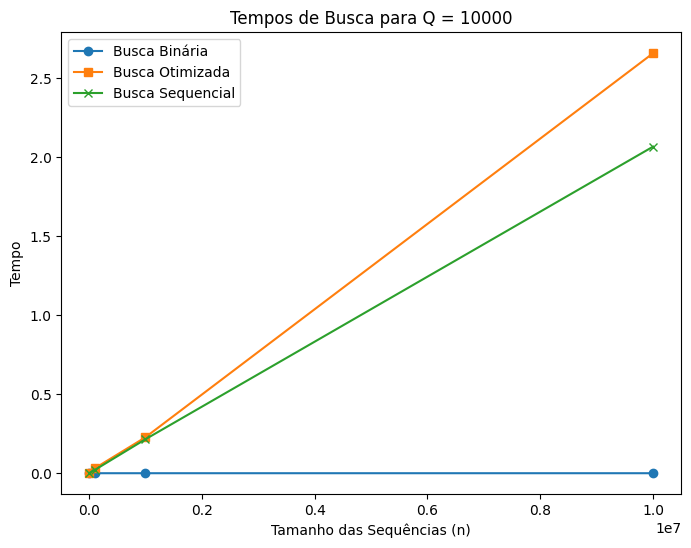

In [38]:
import matplotlib.pyplot as plt

# Dados fornecidos
tamanhos_sequencias = [10000, 100000, 1000000, 10000000]
tempo_binaria = [2.8383999961079098e-05, 3.756700016310788e-05, 5.475699981616344e-05, 6.0259000292717246e-05]
tempo_otimizada = [0.003862208000100509, 0.03035204399975555, 0.22702797500005545, 2.65762649699991]
tempo_sequencial = [0.002106359000208613, 0.01994136500024979, 0.21460753800010934, 2.0666594919998715]

# Plot dos dados
plt.figure(figsize=(8, 6))
plt.plot(tamanhos_sequencias, tempo_binaria, label='Busca Binária', marker='o')
plt.plot(tamanhos_sequencias, tempo_otimizada, label='Busca Otimizada', marker='s')
plt.plot(tamanhos_sequencias, tempo_sequencial, label='Busca Sequencial', marker='x')

# Personalização do gráfico
plt.xlabel('Tamanho das Sequências (n)')
plt.ylabel('Tempo')
plt.title('Tempos de Busca para Q = 10000')
plt.legend()

# Exibir o gráfico
plt.show()


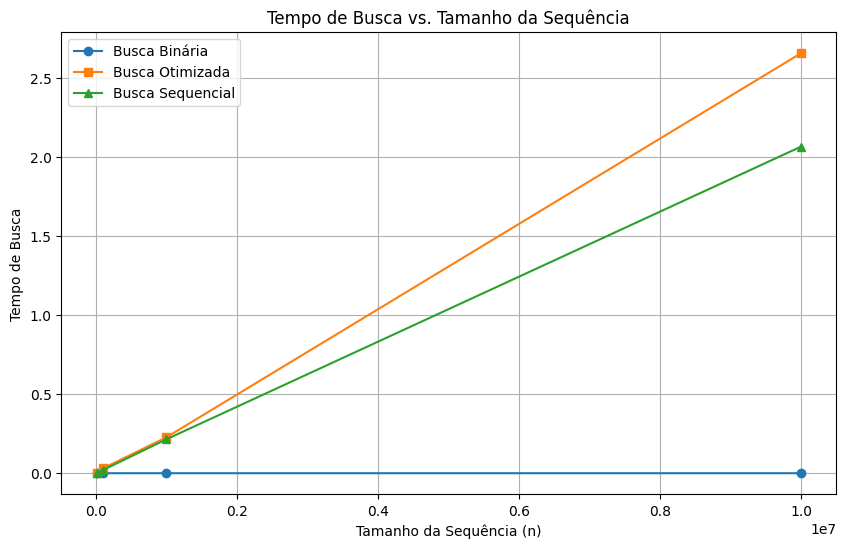

In [30]:
import matplotlib.pyplot as plt

# Dados
n_values = [10000, 100000, 1000000, 10000000]
binaria_tempo = [2.83e-05, 3.76e-05, 5.48e-05, 6.03e-05]
otimizada_tempo = [0.00386, 0.03035, 0.22703, 2.65763]
sequencial_tempo = [0.00211, 0.01994, 0.21461, 2.06666]

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(n_values, binaria_tempo, label='Busca Binária', marker='o')
plt.plot(n_values, otimizada_tempo, label='Busca Otimizada', marker='s')
plt.plot(n_values, sequencial_tempo, label='Busca Sequencial', marker='^')
plt.xlabel('Tamanho da Sequência (n)')
plt.ylabel('Tempo de Busca')
plt.title('Tempo de Busca vs. Tamanho da Sequência')
plt.legend()
plt.grid(True)
plt.show()


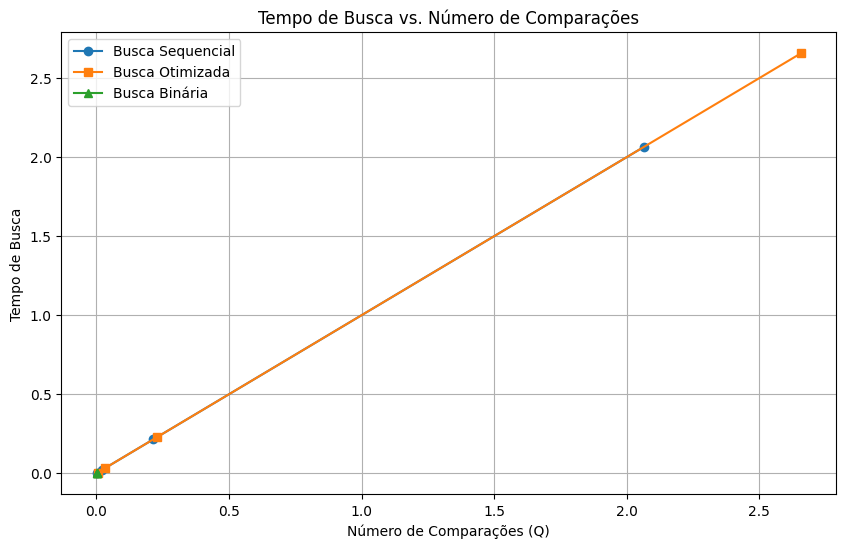

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(sequencial_tempo, sequencial_tempo, label='Busca Sequencial', marker='o')
plt.plot(otimizada_tempo, otimizada_tempo, label='Busca Otimizada', marker='s')
plt.plot(binaria_tempo, binaria_tempo, label='Busca Binária', marker='^')
plt.xlabel('Número de Comparações (Q)')
plt.ylabel('Tempo de Busca')
plt.title('Tempo de Busca vs. Número de Comparações')
plt.legend()
plt.grid(True)
plt.show()


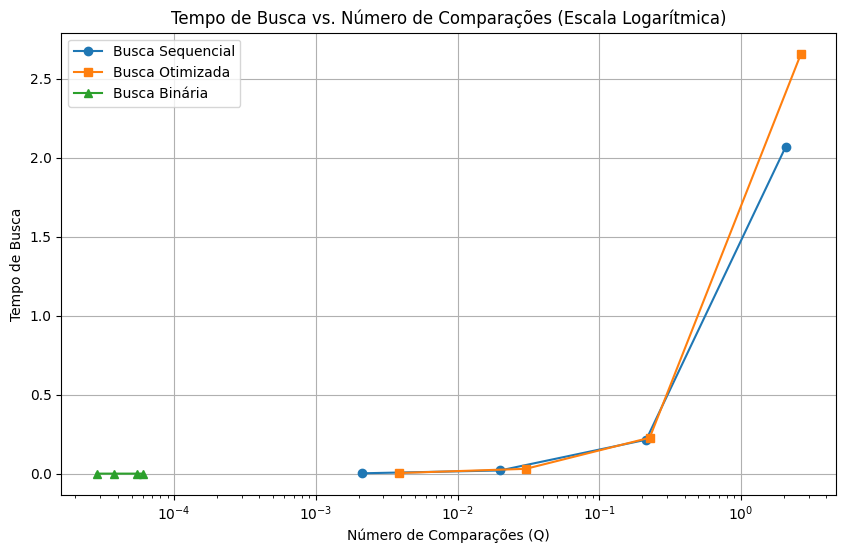

In [32]:
plt.figure(figsize=(10, 6))
plt.semilogx(sequencial_tempo, sequencial_tempo, label='Busca Sequencial', marker='o')
plt.semilogx(otimizada_tempo, otimizada_tempo, label='Busca Otimizada', marker='s')
plt.semilogx(binaria_tempo, binaria_tempo, label='Busca Binária', marker='^')
plt.xlabel('Número de Comparações (Q)')
plt.ylabel('Tempo de Busca')
plt.title('Tempo de Busca vs. Número de Comparações (Escala Logarítmica)')
plt.legend()
plt.grid(True)
plt.show()


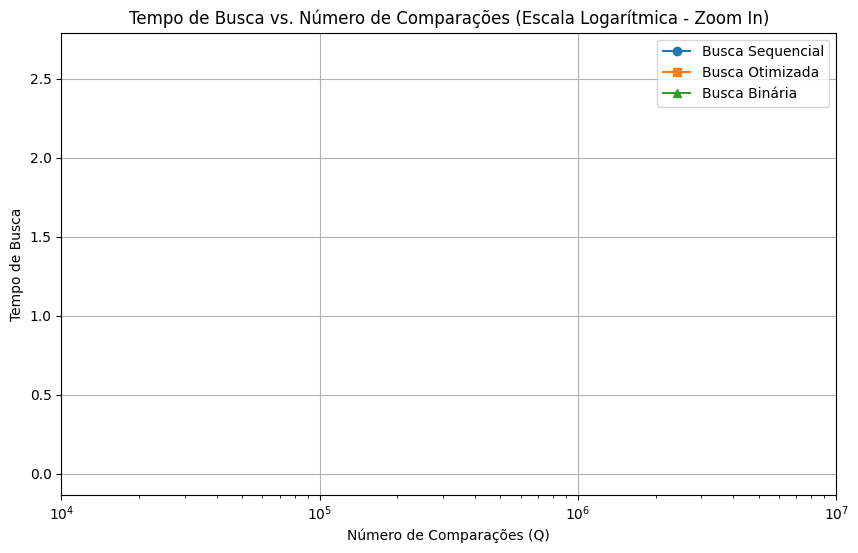

In [34]:
plt.figure(figsize=(10, 6))
plt.semilogx(sequencial_tempo, sequencial_tempo, label='Busca Sequencial', marker='o')
plt.semilogx(otimizada_tempo, otimizada_tempo, label='Busca Otimizada', marker='s')
plt.semilogx(binaria_tempo, binaria_tempo, label='Busca Binária', marker='^')
plt.xlabel('Número de Comparações (Q)')
plt.ylabel('Tempo de Busca')
plt.title('Tempo de Busca vs. Número de Comparações (Escala Logarítmica - Zoom In)')
plt.legend()
plt.grid(True)
plt.xlim(1e4, 1e7)  # Defina os limites do eixo x para a região de interesse
plt.show()
